In [2]:
from Bio import SeqIO, pairwise2
from Bio.Seq import Seq
from Bio.SeqUtils import GC, MeltingTemp as mt, molecular_weight as mw, nt_search
from collections import Counter
from matplotlib import pyplot as plt
from Levenshtein import distance

In [4]:
record = SeqIO.read('b.fasta', 'fasta')
seqA = record.seq
print("seq A:", seqA)
print("length:", len(seqA))
print("complement:", seqA.complement())
print("transcribe:", seqA.transcribe())
print("translate:", seqA.translate())

seq A: GAATTCTGTGCCCTCACTCCCCTGGATCCCTGGGCAAAGCCCCAGAGGGAAACACAAACAGGTTGTTGTAACACACCTTGCTGGGTACCACCATGGAGGACAGTTGGCTTATGGGGGTGGGGGGTGCCTGGGGCCACGGAGTGACTGGTGATGGCTATCCCTCCTTGGAACCCCTCCAGCCTCCTCTTAGCTTCAGATTTGTTTATTTGTTTTTTACTAAGACCTGCTCTTTCAGGTCTGTTGGCTCTTTTAGGGGCTGAAGAAGGCCGAGTTGAGAAGGGATGCAAGGGAGGGGGCCAGAATGAGCCCTTAGGGCTCAGAGCCTCCATCCTGCCCCAAGATGTCTACAGCTTGTGCTCCTGGGGTGCTAGAGGCGCACAAGGAGGAAAGTTAGTGGCTTCCCTTCCATATCCCGTTCATCAGCCTAGAGCATGGAGCCCAGGTGAGGAGGCCTGCCTGGGAGGGGGCCCTGAGCCAGGAAATAAACATTTACTAACTGTACAAAGACCTTGTCCCTGCTGCTGGGGAGCCTGCCAAGTGGTGGAGACAGGACTAGTGCACGAATGATGGAAAGGGAGGGTTGGGGTGGGTGGGAGCCAGCCCTTTTCCTCATAAGGGCCTTAGGACACCATACCGATGGAACTGGGGGTACTGGGGAGGTAACCTAGCACCTCCACCAAACCACAGCAACATGTGCTGAGGATGGGGCTGACTAGGTAAGCTCCCTGGAGCGTTTTGGTTAAATTGAGGGAAATTGCTGCATTCCCATTCTCAGTCCATGCCTCCACAGAGGCT
length: 795
complement: CTTAAGACACGGGAGTGAGGGGACCTAGGGACCCGTTTCGGGGTCTCCCTTTGTGTTTGTCCAACAACATTGTGTGGAACGACCCATGGTGGTACCTCCTGTCAACCGAATACCCCCACCCCCCACGGACCCCGGTGCCTCACTGACCACTACCGATAGGGAGGAACCTTGGG

In [5]:
seqPart = seqA[4:40]
print("seq 5 to 40:", seqPart)

seq 4 to 50: TCTGTGCCCTCACTCCCCTGGATCCCTGGGCAAAGC


In [11]:
nt_search(str(seqA), 'AGCT')

['AGCT', 188, 348, 719]

In [14]:
temp = [x for x in seqA if x in 'ATCG']
temp = ''.join(temp)
print("GC:", GC(temp))
print("AT:", 100-GC(temp))

GC: 55.22012578616352
AT: 44.77987421383648


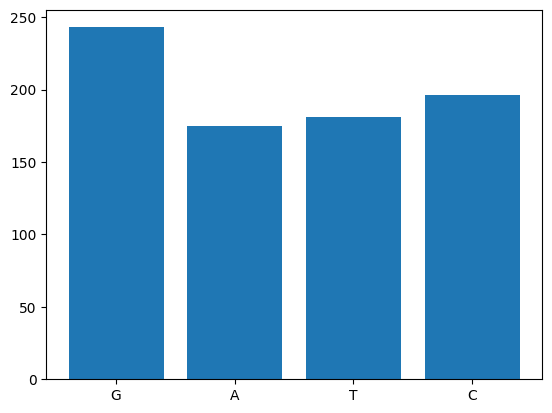

In [16]:
resCounter = Counter(seqA)
plt.bar(resCounter.keys(), resCounter.values())
plt.show()

In [17]:
print("tm_wallace:", mt.Tm_Wallace(seqA))
print("tm_gc:", mt.Tm_GC(seqA))
print("tm_nn:", mt.Tm_NN(seqA))

tm_wallace: 2468.0
tm_gc: 81.54042685661014
tm_nn: 84.67975018100782


In [18]:
print("molecular weight:", mw(seqA))

molecular weight: 246564.7884999994


In [20]:
seqB = "CGTAGCTAGCGACTAGTCGACAGCGATCGATGATATGCATGATGATGTATATAATGTGCAGTCGATGCTGATGCATTCTGGCGTCTGACGCTAGCTAGGCTAGCTAGCAGCTAGCTGATCGATGCGATGCTAGTACTGAGTCGACGATGCTAGCTA"
globalAlignxx = pairwise2.align.globalxx(seqA, seqB)
print(pairwise2.format_alignment(*globalAlignxx[0]))
globalAlignmx = pairwise2.align.globalmx(seqA, seqB, 5, -2)
print(pairwise2.format_alignment(*globalAlignmx[0]))

GAATTCTGTGCCCTCACTCCCCTGGATCCCTGGGCAAAGCCCCAGAGGGAAACACAAACAGGTTGTTGTAACACACCTTGCTGGGTACCACCATGGAGGACAGTTGGCTTATGGGGGTGGGGGGTGCCTGGGGCCACGGAGTGACTGGTGATGGCTATCCCTCCTTGGAACCCCTCCAGCCTCCTCTTAGCTTCAGATTTGTTTATTTGTTTTTTACTAAGACCTGCTCTTTCAGGTCTGTTGGCTCTTTTAGGGGCTGAAGAAGGCCGAGTTGAGAAGGGATGCAAGGGAGGGGGCCAGAATGAGCCCTTAGGGCTCAGAGCCTCCATCCTGCCCCAAGATGTCTACAGCTTGTGCTCCTGGGGTGCTAGAGGCGCACAAGGAGGAAAGTTAGTGGCTTCCCTTCCATATCCCGTTCATCAGCCTAGAGCATGGAGCCCAGGTGAGGAGGCCTGCCTGGGAGGGGGCCCTGAGCCAGGAAATAAACATTTACTAACTGTACAAAGACCTTGTCCCTGCTGCTGGGGAGCCTGCCAAGTGGTGGAGACAGGACTAGTGCACGAATGATGGAAAGGGAGGGTTGGGGTGGGTGGGAGCCAGCCCTTTTCCTCATAAGGGCCTTAGGACACCATACCGATGGAACTGGGGGTACTGGGGAGGTAACCTAGCACCTCCACCAAACCACAGCAACATGTGCTGAGGATGGGGCTGACTAGGTAAGCTCCCTGGAGCGTTTTGGTTAAATTGAGGGAAATTGCTGCATTCCCATTCTCAGTCCATGCCTCCACAGAGGCT
                                                                                |   |        |       |    || ||                     |   |     |||   | |  |       | |   |         |       |  ||   |      |   

In [21]:
def hamming(seq1, seq2):
    return len([(x,y) for x, y in zip(seq1, seq2) if x != y])
seqC = "AGCTGATCGTACGTAGGACGTAGTCGATATCTACATGAGCGCGGCGCATATATATATGCGATCGTAGCTGACGATCATCATCGTAGCTAGTCGATGCTAGCTGATCGCCCCCGGGGGGGGATATATTATATAGGTATAAAAAATGTGTGTTGGTTTTTTTTTTTTTTTTCAGTCGTAGCTGATCGATGCGATGCTAGTCGTAGCTGATCGATCGTAGCTGATCGTAACGACGTCCAGAGTTTTTTCTTTAGCAAACAGATTTATTACAAACGGTGAAAAATGCAGAGGCAACTTAAAGCCCATTCCAGTAAAAAACATTCAGGCTTTGGAGAATCGGAGAAAGTCCACCTGGATGTCAACCTGAAGAAACATTTGGAAAACTTGGAGTCAGTTTTCAGCTTTTTAAGCCCTTTATTTTTTGCCTCTTATTTGTATGTTTCTTTTCTCAACGAAAAATGTTTTAATTTTAGCACAATCAACGTAAACCTGACGGTCTAATTTCATCTGAGTGATAGCTAGAATTAGTGTGCCATTGGTTGTTTGTTTTCATTTTGTAGATTTACTACATTGAGTGTGCGAATGTGTCATGAATTTCGTTTAAAGTTTGCATATTCCAGTAGCAAATTAAATGTTTATAAAAAATAAGTTTTGTTTTGGATCTGAAGTGCATGATATTGCATATTGTTAATGAACTTACAGACTTCTTCTTGTGGCGTAGCGATCGTAGCTGATGCTGATCGATGCTAGTCGATGCGATCGTAGCTGATGCTAGCTGATCGTAGCTAGCTAGCTAGTCGTGTGCTGTCGTGTGTGATCATCGATGCTAGCGATCGAGCTAGCTGATCGAGCTAGTCGATCGTAGCTAGTCGATGCTAGCTGATCGTAGCTGATCGTATATTTATATATATGCGCTACTAGCTTGACGATCATGCTAGTGTGTGTCGTAGCTGATGCGCGCGCGTATATATATAATTTTTTTTAAAGTCGATGCCCCCCCCGGGGGAGATGTCAGCTGATCGATGCTAGGATATGCTGATCGTAGCTGACGATGCTGATGCTAGGGCGCCCGGGATTATATATTTTTAAAGGCTACGTACGGGCGCGCGGGGCGAGCTGAGGGGCGCGCGGTATATATTATAGCTGTAGCTAGCTGAGCTAGCTGGGGATAAAAAATTTTTTATGCTAGCTGATCGATGCATCGCGAGA"
print("hamming distance:", hamming(seqA, seqC))

hamming distance: 606


In [22]:
seqD = "TAGAGGCAATGTTATATGAGAATCCTCCAAATGTCCTCCGACATAAATAGCCGGCTCCACCTGTTTGCCTGCACCTGACGTAGCGCCAACTGTCCTCTACCATGGGGGGGCTGCATATCGCACAGCTGTGCGGGTAGAAACTCACATTCCATGGCGATTAGTCGCCGGTGCAGCACATGGGAGCTAATTCGGCATGTGCCCCCAAGCGGGCAGGATAAGGACGCAAGCAATAATGATTGAATGCATAGGACGATGCACACTCGGATGAAGTCTGTCACCTTGGTGCGTTGTATACTCACTCTTTGCCGTGCCGGCAAAATCGGTAAAGGAAGAAGGGTGGTAGCGTCGTTGGGAGGCTCGAAAGCATAAAGTATAGATGCCCTGTAGCACCGTATGCTAGACAGGTTCTAGAGCCCTACCTGTATGAAACCCTTGAACCGCTATCGAGCACGTGTCAAACCCCACCAGATCGTGGAATCCCGCGAGGCGTCATCTATGTACTGTGCTATATCCCCCTTGGCGACCCAGTGATGCCAGGGGCTTGCGTCAAACCAAGTTGGTAGTATCTATCGACATGATAGAATCCATCGTCTAGGATTACGTAAGCCGCAAGCACTCGATCAGGCGCTAGAGCCATTCACATATATATAAGCTCTCGATCTAAGAAGCGTCATCGATCCCTCTAGGATGCCAAGCTTGTGGTTGATCGACATATACAGCTATAAGTCAACGGGCCTTCCACCCGCGTTTTTCTCGCTAGTGATTGCCACACGAGTATACCAAGAGCAAGCATAAGCGTACCGTACCCCGCAGAACAGTAAAACTCCGGGCTCCGAA"
print("levenhstein distance:", distance(seqA, seqD))

levenhstein distance: 446
